In [577]:
#1 The most amount of business, drivers and fares occur in urban environment
#2 For the most part, average city fair is between $20-$30 
#3 Majority of rural fares are more expansive than urban fares. 

In [578]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [579]:
cwd = os.getcwd()

In [580]:
inputFile1 = 'city_data.csv'
inputFile2 = 'ride_data.csv'

In [581]:
csvpath1 = os.path.join(cwd, inputFile1)
csvpath2 = os.path.join(cwd, inputFile2)

In [582]:
city_df = pd.read_csv(csvpath1)
ride_df = pd.read_csv(csvpath2)

In [583]:
len(city_df[city_df.duplicated(['city'], keep=False)]) #checking for duplicates

2

In [584]:
len(ride_df[ride_df.duplicated(['ride_id'], keep=False)]) #checking for duplicates

0

In [585]:
summary_df = pd.merge(city_df, ride_df, how='outer', on='city')

In [586]:
avg_fare = summary_df.groupby('city')['fare'].mean()

In [587]:
rides_per_city = summary_df.groupby('city')['ride_id'].count()

In [588]:
tot_fare = summary_df.groupby('city')['fare'].sum()

In [589]:
temp = summary_df.groupby('city')['driver_count', 'type']

In [590]:
temp2 = pd.DataFrame({'city':avg_fare.index, 'avg_fare':avg_fare.values, 
                      'rides_per_city': rides_per_city.values, 'total_fares':tot_fare.values})
temp2 = temp2[['city', 'total_fares','avg_fare', 'rides_per_city']]

In [591]:
temp2 = pd.merge(temp2, city_df, how='outer', on='city')

In [592]:
urban_df = temp2[temp2.type=='Urban']
suburban_df = temp2[temp2.type=='Suburban']
rural_df = temp2[temp2.type=='Rural']

In [593]:
urban_handle = plt.scatter(urban_df['rides_per_city'], urban_df['avg_fare'], marker="o", 
            facecolors="red", edgecolors="black", label="urban", alpha=0.75)
suburban_handle = plt.scatter(suburban_df['rides_per_city'], suburban_df['avg_fare'], marker="o", 
            facecolors="yellow", edgecolors="black", label="suburban", alpha=0.75)
rural_handle = plt.scatter(rural_df['rides_per_city'], rural_df['avg_fare'], marker="o", 
            facecolors="blue", edgecolors="black", label="rural", alpha=0.75)

In [594]:
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
plt.xlim(0, 70)
plt.ylim(0, 60)
plt.grid()
plt.legend(handles=[urban_handle, suburban_handle, rural_handle],loc="lower right")

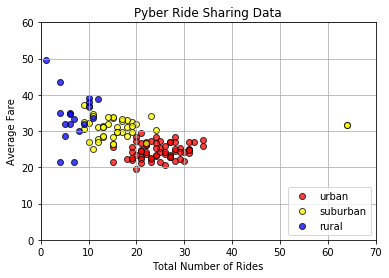

In [595]:
plt.show()

In [596]:
totalFares = temp2.groupby('type')['total_fares', 'avg_fare'].sum()

In [597]:
ruralFares = totalFares.loc['Rural'][0]
suburbanFares = totalFares.loc['Suburban'][0]
urbanFares = totalFares.loc['Urban'][0]

In [598]:
plt.title('% of Total Fares by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [ruralFares, suburbanFares, urbanFares]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]

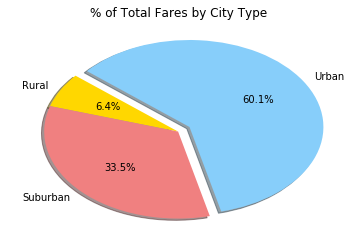

In [599]:
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.show()

In [600]:
totalRides = temp2.groupby('type')['rides_per_city', 'driver_count'].sum()

In [601]:
ruralRides = totalRides.loc['Rural'][0]
suburbanRides = totalRides.loc['Suburban'][0]
urbanRides = totalRides.loc['Urban'][0]

In [602]:
plt.title('% of Total Rides by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [ruralRides, suburbanRides, urbanRides]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]

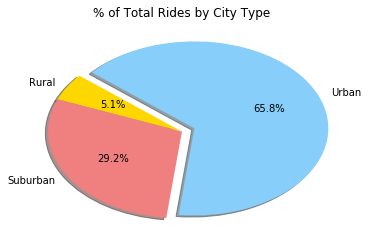

In [603]:
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.show()

In [604]:
ruralDrivers = totalRides.loc['Rural'][1]
suburbanDrivers = totalRides.loc['Suburban'][1]
urbanDrivers = totalRides.loc['Urban'][1]

In [605]:
plt.title('% of Total Drivers by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [ruralDrivers, suburbanDrivers, urbanDrivers]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]

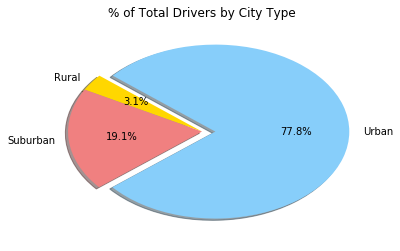

In [606]:
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.show()

In [ ]:
#1 The most amount of business, drivers and fares occur in urban environment
#2 For the most part, average city fair is between $20-$30 
#3 Majority of rural fares are more expansive than urban fares. 